In [1]:
from proveit.number.arithmeticOps import *
#from proveit.number.real.theorems import *
from proveit.number.real.theorems import divIneqThm1, divIneqThm1cor, ineqThm3, ineqThm4a, ineqThm4b, ineqThm9, ineqThm10
from proveit.number.real.theorems import posProd, posOfExps, squarePosIneq
from proveit.number.complex.theorems import absProd, absProdEtc, expAdd1a, oneExp, fracExp
from proveit.number.relation import Relation
from proveit.basiclogic import In, autoSubstitute, autoSubstitution
from proveit.number.real.theorems import absTwoPi, absPos
from proveit.number.complex.theorems import multAssoc
from proveit.number.common import *

In [57]:
from proveit.number.complex.theorems import powOfProd

In [2]:
alpha_l = Operation(Variable('alpha',{STRING:'alpha',LATEX:r'\alpha'}),l)

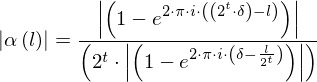

In [3]:
abs_alpha_l = Equals(Abs(alpha_l),
                        Fraction(
                                Abs(Subtract(one,
                                            Exponentiate(e,
                                                        Multiply(two,pi,i,
                                                                Subtract(
                                                                        Multiply(
                                                                                Exponentiate(two,t),delta),
                                                                        l)
                )))
    ),
                            Multiply(Exponentiate(two,t),    
                            Abs(Subtract(one,
                                            Exponentiate(e,
                                                        Multiply(two,pi,i,
                                                                Subtract(
                                                                        delta,
                                                                        Fraction(l,Exponentiate(two,t))
                                

)
                                                                 )
                    )
                                             )
                                    ))
        )
    )
abs_alpha_l

In [4]:
assumptions = {abs_alpha_l}

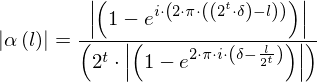

In [5]:
X1 = autoSubstitute(abs_alpha_l, 'factor', [i], superExpr=abs_alpha_l.rhs.numerator, suppressWarnings=True).proven(assumptions)
X1.proven(assumptions)

In [6]:
assumptions = assumptions.union({X1})

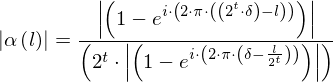

In [7]:
X2 = autoSubstitute(X1, 'factor', [i], superExpr=abs_alpha_l.rhs.denominator, suppressWarnings=True).proven(assumptions)
X2

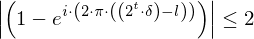

In [8]:
Y1 = ineqThm9.specialize({theta:X2.rhs.numerator.operand.operands[1].exponent.operands[1]})
assumptions = assumptions.union({In(Y1.lhs.operand.operands[1].exponent.operands[1],Reals)})
Y1.proven(assumptions)

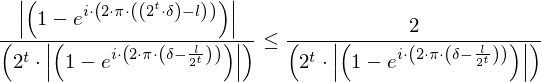

In [9]:
Y2 = divIneqThm1.specialize({a:Y1.lhs,b:X2.rhs.denominator,c:Y1.rhs})
assumptions = assumptions.union({GreaterThan(X2.rhs.denominator,zero),
                                 In(Y1.lhs,Reals),
                                 In(Y1.rhs,Reals),
                                 In(X2.rhs.denominator,Reals)})
Y2.proven(assumptions)

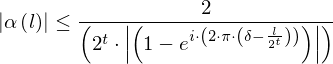

In [10]:
X5 = Relation(X2).update(Y2)
X5.proven(assumptions)

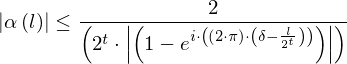

In [11]:
X5a = multAssoc.specialize({Etcetera(w):[],
                            Etcetera(x):two,
                            Etcetera(y):pi,
                     Etcetera(z):Subtract(delta,Fraction(l,Exponentiate(two,t)))}).rhsSubstitute(X5).proven(assumptions)
X5a.proven(assumptions)

In [12]:
assumptions = assumptions.union({In(l,Integers),In(t,Naturals),In(delta,Reals),
                                                    LessThanEquals(Neg(Exponentiate(two,Subtract(t,one))),l),
                                                    LessThanEquals(l,Exponentiate(two,Subtract(t,one))),
                                                    LessThanEquals(zero,delta),
                                                    LessThanEquals(delta,Exponentiate(two,Neg(t)))})

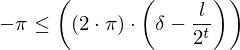

In [13]:
Y3 = ineqThm4a.specialize().proven(assumptions)
Y3

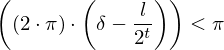

In [14]:
Y4 = ineqThm4b.specialize().proven(assumptions)
Y4

In [15]:
assumptions = assumptions.union({Y3,Y4})

In [16]:
assumptions = assumptions.union({In(X5.rhs.denominator.operands[1].operand.operands[1].exponent.operands[1],Reals),
    LessThanEquals(Neg(pi),X5.rhs.denominator.operands[1].operand.operands[1].exponent.operands[1]),
    LessThanEquals(X5.rhs.denominator.operands[1].operand.operands[1].exponent.operands[1],pi)})

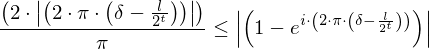

In [17]:
Y5 = ineqThm3.specialize({theta:X5.rhs.denominator.operands[1].operand.operands[1].exponent.operands[1]}).proven(
    assumptions).deriveReversed().proven(assumptions)
Y5

In [18]:
assumptions = assumptions.union({Y5})

In [19]:
assumptions = assumptions.union({In(Y5.lhs,Reals),In(Y5.rhs,Reals),In(Exponentiate(two,t),Reals),GreaterThan(Exponentiate(two,t),zero)})

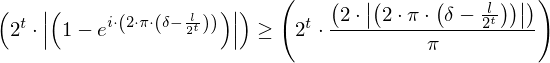

In [20]:
Y6 = divIneqThm1cor.specialize({a:Y5.lhs,c:Y5.rhs,b:Exponentiate(two,t)}).proven(assumptions).deriveReversed().proven(assumptions)
Y6.proven(assumptions)

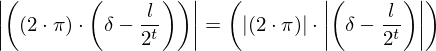

In [21]:
Y7 = absProdEtc.specialize({Etcetera(a):Multiply(two,pi),Etcetera(b):Subtract(delta,Fraction(l,Exponentiate(two,t)))})
assumptions = assumptions.union({In(Y7.lhs.operand.operands[0],Complexes),In(Y7.lhs.operand.operands[1],Complexes)})
Y7.proven(assumptions)

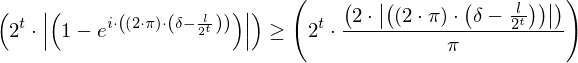

In [22]:
Y8 = multAssoc.specialize(
    {Etcetera(w):[],Etcetera(x):two,Etcetera(y):pi,Etcetera(z):Subtract(delta,Fraction(l,Exponentiate(two,t)))}).rhsSubstitute(Y6)
Y8.proven(assumptions)

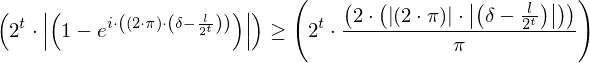

In [23]:
Y9 = Y7.rhsSubstitute(Y8)
Y9.proven(assumptions)

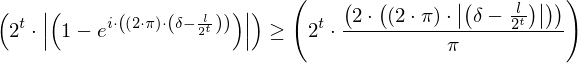

In [24]:
Y10 = absPos.specialize({a:Y7.rhs.operands[0].operand}).rhsSubstitute(Y9)
Y10.proven(assumptions)

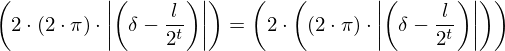

In [25]:
Y11 = multAssoc.specialize({Etcetera(w):two,Etcetera(x):Multiply(two,pi),
                     Etcetera(y):Abs(Subtract(delta,Fraction(l,Exponentiate(two,t)))),Etcetera(z):[]})
Y11.proven(assumptions)

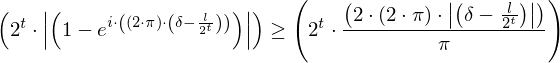

In [26]:
Y12 = Y11.lhsSubstitute(Y10)
Y12.proven(assumptions)

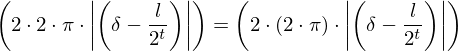

In [27]:
Y13 = multAssoc.specialize({Etcetera(w):two,Etcetera(x):two,
                            Etcetera(y):pi,Etcetera(z):Abs(Subtract(delta,Fraction(l,Exponentiate(two,t))))})
Y13.proven()

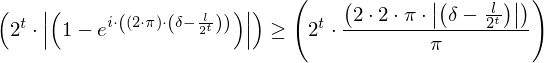

In [28]:
Y14 = Y13.lhsSubstitute(Y12)
Y14.proven(assumptions)

In [29]:
assumptions = assumptions.union({In(pi,Complexes),
                              In(Multiply(two,two,Abs(Subtract(delta,Fraction(l,Exponentiate(two,t))))),Complexes)
                             })

_0_
_0_ / pi
proveit.number.arithmeticOps.Multiply
proveit.number.arithmeticOps.Multiply


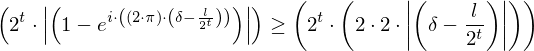

In [30]:
Y15 = Y14.rhs.operands[1].cancel(pi).rhsSubstitute(Y14)
Y15.proven(assumptions)

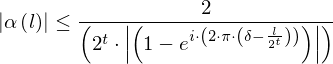

In [31]:
X5

In [32]:
assumptions = assumptions.union({In(two,Reals),In(t,Reals),GreaterThan(two,zero)})

In [33]:
Y16 = posOfExps.specialize({x:two,y:t}).proven(assumptions)
Y16

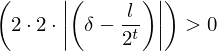

In [34]:
Y17 = GreaterThan(Multiply(two,two,Abs(Subtract(delta,Fraction(l,Exponentiate(two,t))))),zero)
Y17.proven({Y17})#Will need to go back and prove Y17

In [35]:
assumptions = assumptions.union({Y16,Y17,In(Y16.lhs,Reals),In(Y17.lhs,Reals)})

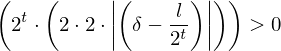

In [36]:
Y18 = posProd.specialize({x:Y16.lhs,y:Y17.lhs})
Y18.proven(assumptions)

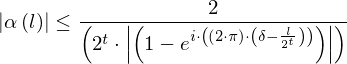

In [37]:
X5a = multAssoc.specialize({Etcetera(w):[],
                            Etcetera(x):two,
                            Etcetera(y):pi,
                     Etcetera(z):Subtract(delta,Fraction(l,Exponentiate(two,t)))}).rhsSubstitute(X5).proven(assumptions)
X5a

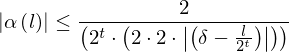

In [38]:
X19 = ineqThm10.specialize({w:X5.lhs,
                      x:X5a.rhs.numerator,
                      y:X5a.rhs.denominator,
                      z:Y18.lhs})
assumptions = assumptions.union({In(X5a.lhs,Reals),
                                 In(X5a.rhs.numerator,Reals),
                                 In(X5a.rhs.denominator,Reals),
                                 In(Y18.lhs,Reals),
                                 X5a,
                                 Y15,
                                 GreaterThan(X5a.lhs,zero),
                                 GreaterThan(two,zero),
                                 GreaterThan(X5a.rhs.denominator,zero),
                                 Y18
                                })#,
#                                 
#                                 ,})
X19.proven(assumptions)

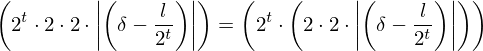

In [39]:
multAssoc.specialize({Etcetera(w):Exponentiate(two,t),
                      Etcetera(x):[two,two],
                      Etcetera(y):Abs(Subtract(delta,Fraction(l,Exponentiate(two,t)))),
                      Etcetera(z):[]})

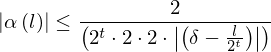

In [40]:
X20 = multAssoc.specialize({Etcetera(w):Exponentiate(two,t),
                      Etcetera(x):[two,two],
                      Etcetera(y):Abs(Subtract(delta,Fraction(l,Exponentiate(two,t)))),
                      Etcetera(z):[]}).lhsSubstitute(X19).proven(assumptions)
X20

_0_
2 / _0_
proveit.number.arithmeticOps.Multiply
proveit.number.arithmeticOps.Multiply


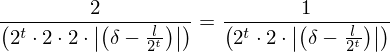

In [41]:
Y21 = X20.rhs.cancel(two)
assumptions = assumptions.union({In(two,Complexes),In(Multiply(Exponentiate(two,t),two,Abs(Subtract(delta,Fraction(l,Exponentiate(two,t))))),Complexes)})
Y21.proven(assumptions)

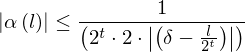

In [42]:
X22 = Y21.rhsSubstitute(X20)
X22.proven(assumptions)

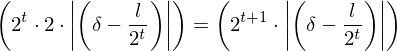

In [43]:
assumptions = assumptions.union({In(t,Complexes),In(two,Complexes),In(Abs(Subtract(delta,Fraction(l,Exponentiate(two,t)))),Complexes)})
Y23 = expAdd1a.specialize({x:two,y:t,z:Abs(Subtract(delta,Fraction(l,Exponentiate(two,t))))})
Y23.proven(assumptions)

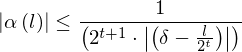

In [44]:
X24 = Y23.rhsSubstitute(X22)
X24.proven(assumptions)

In [45]:
from proveit.number.real.theorems import squarePosIneq

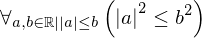

In [46]:
squarePosIneq

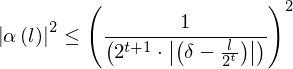

In [47]:
X25 = squarePosIneq.specialize({a:alpha_l,b:X24.rhs})
assumptions = assumptions.union({X24,In(alpha_l,Reals),In(X24.rhs,Reals)})
X25.proven(assumptions)

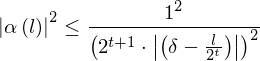

In [64]:
X26 = fracExp.specialize({x:one,
                          y:Multiply(Exponentiate(two,Add(t,one)),Abs(Subtract(delta,Fraction(l,Exponentiate(two,t))))),
                          z:two}).rhsSubstitute(X25)
assumptions = assumptions.union({In(one,Complexes),In(X26.rhs.denominator.base,Complexes),In(two,Complexes)})
X26.proven(assumptions)

In [67]:
powOfProd

In [66]:
X27 = powOfProd.specialize({a:Exponentiate(two,Add(t,one)),
                            b:Abs(Subtract(delta,Fraction(l,Exponentiate(two,t)))),
                            c:two}).rhsSubstitute(X26)
assumptions = assumptions.union({In(Exponentiate(two,Add(t,one)),Complexes),
                                 In(Abs(Subtract(delta,Fraction(l,Exponentiate(two,t)))),Complexes),
                                 In(two,Complexes)})
X27.proven(assumptions)

ProofFailure: Proof failed: |alpha(l)|^(2) <= 1^(2) / ((2^(t + 1))^(2) * |(delta - l / 2^(t))|^(2)) assuming {alpha(l) in Reals, t in Naturals, 2^(t) > 0, |(delta - l / 2^(t))| in Complexes, |alpha(l)| = |(1 - e^(2 * pi * i * ((2^(t) * delta) - l)))| / (2^(t) * |(1 - e^(2 * pi * i * (delta - l / 2^(t))))|), pi in Complexes, t in Reals, |alpha(l)| > 0, l <= 2^(t - 1), (2^(t) * |(1 - e^(i * (2 * pi * (delta - l / 2^(t)))))|) > 0, (2^(t) * |(1 - e^(i * ((2 * pi) * (delta - l / 2^(t)))))|) in Reals, (2^(t) * |(1 - e^(i * ((2 * pi) * (delta - l / 2^(t)))))|) >= (2^(t) * (2 * 2 * |(delta - l / 2^(t))|)), |alpha(l)| <= 2 / (2^(t) * |(1 - e^(i * ((2 * pi) * (delta - l / 2^(t)))))|), 1 / (2^(t + 1) * |(delta - l / 2^(t))|) in Reals, (2 * |(2 * pi * (delta - l / 2^(t)))|) / pi <= |(1 - e^(i * (2 * pi * (delta - l / 2^(t)))))|, (2^(t) * |(1 - e^(i * ((2 * pi) * (delta - l / 2^(t)))))|) > 0, l in Integers, -pi <= ((2 * pi) * (delta - l / 2^(t))), |(1 - e^(i * (2 * pi * (delta - l / 2^(t)))))| in Reals, -pi <= (2 * pi * (delta - l / 2^(t))), ((2 * pi) * (delta - l / 2^(t))) < pi, delta <= 2^(-t), (2^(t) * (2 * 2 * |(delta - l / 2^(t))|)) in Reals, (2^(t + 1) * |(delta - l / 2^(t))|) in Complexes, 2^(t) in Reals, 2 in Reals, 0 <= delta, |alpha(l)| <= 1 / (2^(t + 1) * |(delta - l / 2^(t))|), (2 * pi) in Complexes, (2 * pi * (delta - l / 2^(t))) in Reals, (2 * 2 * |(delta - l / 2^(t))|) in Reals, (2 * |(2 * pi * (delta - l / 2^(t)))|) / pi in Reals, delta in Reals, -2^(t - 1) <= l, (2 * pi * (delta - l / 2^(t))) <= pi, (delta - l / 2^(t)) in Complexes, (2 * pi * ((2^(t) * delta) - l)) in Reals, (2^(t) * 2 * |(delta - l / 2^(t))|) in Complexes, |alpha(l)| = |(1 - e^(i * (2 * pi * ((2^(t) * delta) - l))))| / (2^(t) * |(1 - e^(2 * pi * i * (delta - l / 2^(t))))|), 2 > 0, (2 * 2 * |(delta - l / 2^(t))|) > 0, (2^(t) * |(1 - e^(i * (2 * pi * (delta - l / 2^(t)))))|) in Reals, 2 in Complexes, |alpha(l)| in Reals, (2 * 2 * |(delta - l / 2^(t))|) in Complexes, t in Complexes, (2^(t) * (2 * 2 * |(delta - l / 2^(t))|)) > 0, 1 in Complexes, |(1 - e^(i * (2 * pi * ((2^(t) * delta) - l))))| in Reals}